## 泰坦尼克号数据分析


### 提出问题
首先，根据泰坦尼克号的数据，可以提出的问题有
1. 有哪些因素会让船上的人生还率更高。

### 猜想
对乘客生还率可能造成影响的因素有：  
1、性别。发生灾难事件时，大部分情况会先救援女性。变量：Sex  
2、年龄。老人和小孩有可能会有优先被救援的可能。变量：Age  
3、经济地位。经济地位越高，被救援的可能性越大。参考变量：Fare，Cabin,Pclass

## 1、数据准备

#### 读取泰坦尼克号的数据

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
%pylab inline
titanics = pd.read_csv('titanic-data.csv')

Populating the interactive namespace from numpy and matplotlib


In [2]:
titanics.info()  #根据信息可以看出Age、Cabin和Embarked数据有缺失。

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
titanics.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 数据清洗

In [4]:
#将数据中没有年龄的数据筛选出去。
remove_none_age = titanics.dropna(axis=0,subset=['Age'])

In [5]:
remove_none_age.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2、变量分析
### 一维变量分析
#### 年龄分析

Text(0,0.5,u'Count')

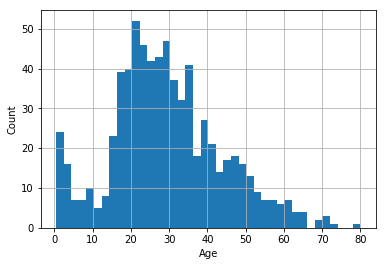

In [24]:
remove_none_age['Age'].hist(bins=40)
plt.xlabel('Age')
plt.ylabel('Count')

In [7]:
print '均值',remove_none_age['Age'].mean() 
print "中位数",remove_none_age['Age'].median()
print "最大值",remove_none_age['Age'].max()
print "最小值",remove_none_age['Age'].min()
print "标准差",remove_none_age['Age'].std()

均值 29.6991176471
中位数 28.0
最大值 80.0
最小值 0.42
标准差 14.5264973323


可以看出乘客年龄主要集中在0-10岁，以及15-35岁这个年龄段。图像接近正态分布。

#### 性别分析

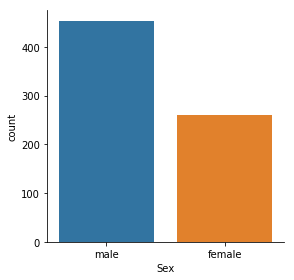

In [8]:
sns.factorplot('Sex',data=remove_none_age,kind='count')

乘客中男性多于女性。

#### 生还人数分析

Text(0,0.5,u'count')

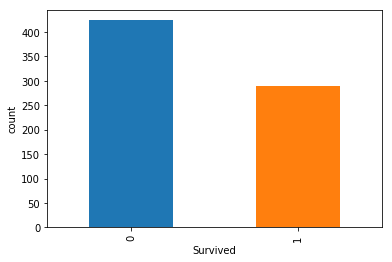

In [23]:
remove_none_age.groupby('Survived')['Survived'].count().plot(kind='bar')
plt.ylabel('count')

通过图表可以看出，生还人数少于未生还人数。

#### 客舱人数分析

Text(0,0.5,u'count')

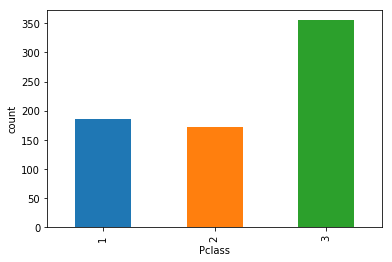

In [22]:
Pclass=(remove_none_age.groupby('Pclass')['PassengerId'].count()) #以Pclass为分组依据，对数据集进行分组。
Pclass.plot(kind='bar') 
plt.ylabel('count')#对分组结果绘图

In [11]:
Pclass

Pclass
1    186
2    173
3    355
Name: PassengerId, dtype: int64

### 二维变量分析
#### 分析性别对生还率的影响

In [12]:
#定义生还率计算函数
def survival_rate(data):
    return data.sum()/data.count()

In [13]:
survived_sex = titanics.groupby('Sex')['Survived']

In [14]:
survival_rate(survived_sex)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Text(0,0.5,u'Survival Rate')

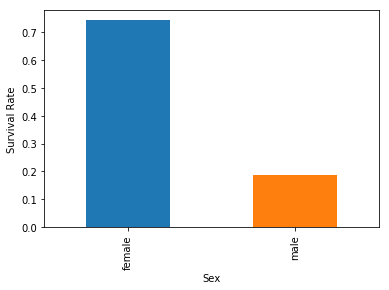

In [15]:
survival_rate(survived_sex).plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')

根据上图可以看出，女性生还率为74.20%，男性生还率为18.89%，女性生还率远远高于男性。

#### 分析年龄对生还率造成的影响

In [16]:
#对年龄进行分组
Grouped_Age=remove_none_age.groupby(pd.cut(remove_none_age['Age'],8,labels=["0~10","10~20","20~30","30~40","40~50","50~60","60~70","70~80"]))
#计算分组后的生还率
Age_group=Grouped_Age['Survived']
Age_group_rate = survival_rate(Age_group)
Age_group_rate

Age
0~10     0.593750
10~20    0.382609
20~30    0.365217
30~40    0.445161
40~50    0.383721
50~60    0.404762
60~70    0.235294
70~80    0.200000
Name: Survived, dtype: float64

Text(0.5,1,u'Influence of Age on the Survival Prob')

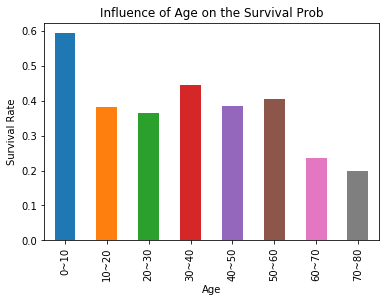

In [17]:
Age_group_rate.plot(kind='bar')
plt.xlabel("Age") 
plt.ylabel("Survival Rate") 
plt.title("Influence of Age on the Survival Prob")

从图表可以看出，随着年龄的增加，生还率逐渐降低。

#### 分析经济地位对生还率的影响

In [18]:
titanics.groupby(titanics['Embarked'])['PassengerId'].count()

Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64

[(0, 200)]

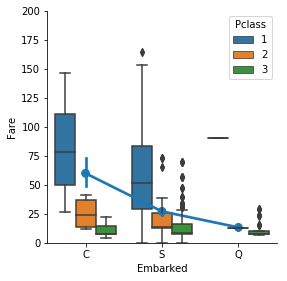

In [19]:
P1 = sns.factorplot(x='Embarked',y='Fare',data=titanics, order=["C","S","Q"])
P2 = sns.boxplot(x='Embarked', y='Fare', hue='Pclass', data=titanics,order=["C","S","Q"])
P2.set(ylim=(0,200))


上图可以看出，一等舱的票价最高，其次是二等舱的票价，最后于三等舱票价。并且再C港上船的乘客购买一等舱二等舱的人数最多，其次是S港，最后是Q港。

Text(0,0.5,u'Survival Rate')

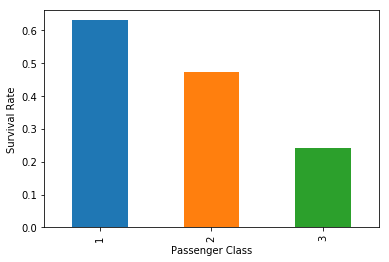

In [20]:
#按Pclass进行分组，提取Survived列，再计算生还比率
Pclass_group=titanics.groupby('Pclass')['Survived']
Pclass_group_rate= survival_rate(Pclass_group)
Pclass_group_rate.plot(kind='bar')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

In [21]:
Pclass_group_rate

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

从上图可以看出，图像比较线性，经济地位对生还率的影响非常重要。经济地位越高生还的可能性越高。

#### 结论：
1、性别与此前猜想一致，女性比男性更能获得生还的可能。
2、年龄因素对生还率也有一定影响，年龄在0-8岁之间和18-35岁之间生还的可能性越大。
3、经济地位对生还率的影响非常重要，经济地位越高，生还的可能性越高。

####  不足：
数据中由于部分乘客没有记录年龄，这一部分乘客未能进行分析，故对最终结果有一定的影响。
由于泰坦尼克号事件是一系列复杂事件最终导致的结果，故本次推论存在一定的偶然性，故该推论并不能完全证明两者之间有任何相关性，仅供参考。